In this project I will investigate the relationship between GDP and life expectancy of several countries over the course of 15 years. First, we import the necessary tools.

In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

Load the dataset from a csv file.

In [177]:
file = pd.read_csv("all_data.csv")
print(file.head())
print(file.isna().sum())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


The data looks tidy and does not contain any missing values. We can proceed. First, we rename the column for life expectancy data to make it easier to work with later.

In [178]:
file.rename(columns={"Life expectancy at birth (years)": "Life_expectancy"}, inplace=True)
print(file.head())

  Country  Year  Life_expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


We can find out how life expectancy for each country has changed over the years by creating a scatterplot.

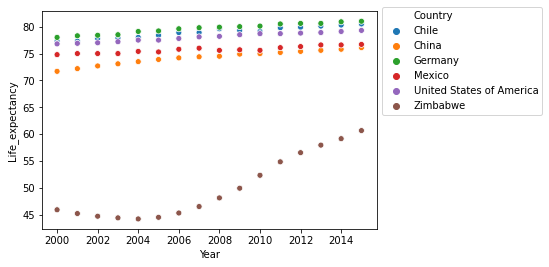

<Figure size 432x288 with 0 Axes>

In [179]:
ax = sns.scatterplot(data=file,x="Year",y="Life_expectancy",hue="Country",legend="brief")
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.clf()

Overall, the life expectancy for every country increases over time. The most significant improvement in life expectancy is in Zimbabwe, where it increased from 45 years to 60 years within 15 years! For more developed nations like Germany and the US, the change is less signficant. Also, notice the increase in life expectancy in China versus the stagnation in Mexico.

Alternatively, we can plot this data as a boxplot. In addition to showing the change in life expectancy over time, it also gives mean life expectancy and quartiles for each country.

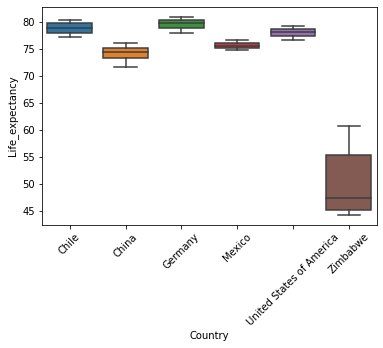

<Figure size 432x288 with 0 Axes>

In [180]:
sns.boxplot(x=file["Country"],y=file["Life_expectancy"])
plt.xticks(rotation=45)
plt.show()
plt.clf()

Next, we take a look at how GDP has changed over the years by making another scatterplot.

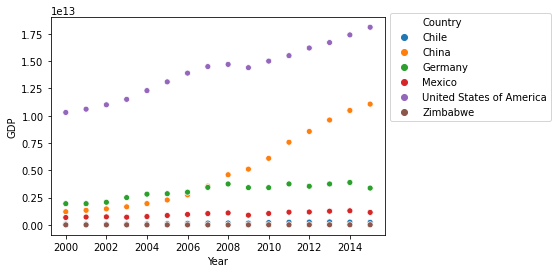

<Figure size 432x288 with 0 Axes>

In [181]:
ax = sns.scatterplot(data=file,x="Year",y="GDP",hue="Country",legend="brief")
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.clf()

Unexpectedly, the GDP of the US is the strongest over the 15 years of data and increases linearly with time. However, China is on the rise and displays a nearly exponential growth. Surprisingly, Germany has only grown slightly over the course of 15 years. The growth in other countries is much lower.

We can also plot this data as a boxplot to get mean values and quartiles.

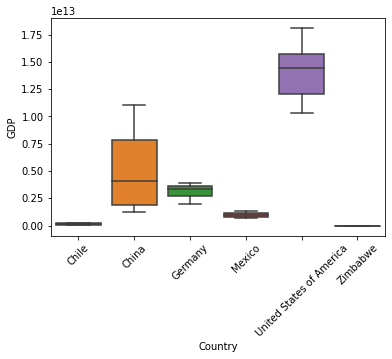

<Figure size 432x288 with 0 Axes>

In [182]:
sns.boxplot(x=file["Country"],y=file["GDP"])
plt.xticks(rotation=45)
plt.show()
plt.clf()

Taking into account these data, we suspect that there is a correlation between GDP and life expectancy. We can first get a sense of this hypothesis by making another scatterplot, which will show GDP versus life expectancy.

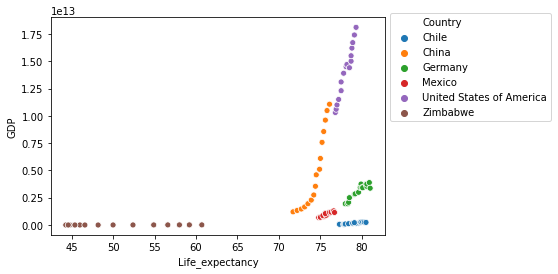

<Figure size 432x288 with 0 Axes>

In [183]:
ax = sns.scatterplot(data=file,x="Life_expectancy",y="GDP",hue="Country")
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.clf()

It seems as though all cases show a linear relationship between GDP and life expectancy, which is what we would expect. However, to get statistical a parameter to describe this relationship, we calculate the Pearson correlation coefficient for GDP and life expectancy, as well as the accompanying p-value.

The coefficient (-1 to +1) describes the extent of linearity in the data, whereas the p-value is a measure of the confidence in the coefficient accurately describing the data. 

In [184]:
Countries= file["Country"].unique()
corr = []
p_value = []
for i in Countries:
    correlation,p = pearsonr(file.GDP[file.Country==i],file.Life_expectancy[file.Country==i])
    corr.append(correlation)
    p_value.append(p)
    
print("Array of correlation coefficients:\n")
print(Countries)
print(corr,"\n")
print("Array of p-values:\n")
print(p_value)

Array of correlation coefficients:

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[0.9498766659254416, 0.9085255408648358, 0.9326988982561268, 0.9322377167847081, 0.9817092382430257, 0.9661998955858777] 

Array of p-values:

[1.865913974658531e-08, 1.1250985720700642e-06, 1.401881553404592e-07, 1.4686960248305143e-07, 1.7499709269099464e-11, 1.2358516366846197e-09]


The correlation coefficient is almost 1 in all cases, which is a strong indicator for correlation and linearity in the data. Interestingly, the highest degree of linearity is shown for the US and Zimbabwe.

China has the lowest correlation coefficient (0.90) because while the life expectancy is increasing linearly over time, the GDP has actually grown exponentially over the course of 15 years!

Next, we want to find the mean life expectancy for each country.

In [185]:
for country in Countries:
    mean_life_expectancy = np.round(file.Life_expectancy[file.Country == country].mean(),0)
    print("The mean life expectancy is {} for {}.".format(mean_life_expectancy,country))

The mean life expectancy is 79.0 for Chile.
The mean life expectancy is 74.0 for China.
The mean life expectancy is 80.0 for Germany.
The mean life expectancy is 76.0 for Mexico.
The mean life expectancy is 78.0 for United States of America.
The mean life expectancy is 50.0 for Zimbabwe.


This concludes the project for now. Admittedly, the dataset is limited and does not take into account other factors that can affect life expectancy or GDP, such as access to natural resources and prevalence of higher education in each country.